In [2]:
#basic imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
sns.set()
import os
import sys
import tomotopy as tp
import os
import re
import pyLDAvis
import seaborn as sns
import nltk
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
       # print(os.path.join(dirname, filename))
#print(os.walk('/kaggle/input'))

In [3]:
def get_all_files_in_directory(directory):
    file_paths = []
    timestamps = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.txt'):
                file_paths.append(os.path.join(root, file))
                timestamp = os.path.basename(root)
                timestamps.append(timestamp)
    return file_paths, timestamps
    
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    stop_words = set(["a", "an", "the", "and", "or", "but", "if", "on", "in", "to", "is", "of", "for"])
    words = [word for word in re.split(r'(\s+)', text) if word.strip() and (word in {'\n', '<br>', '<p>'} or (len(word) > 2 and word not in stop_words))]
    processed_text = ' '.join(words)
    return processed_text

In [4]:
import os
import re
import pandas as pd
import numpy as np
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

#main_directory_path = '/kaggle/input/psb-conference-papers/Main Bodies/Main Bodies/'
main_directory_path = './PSB_Papers/main_body'

print('get files')

file_paths, timestamps = get_all_files_in_directory(main_directory_path)


get files


In [5]:
texts = []
titles = []
for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        processed_text = preprocess_text(text)
        texts.append(processed_text)
        titles.append(file_path[23:])

timestamps = pd.to_datetime(timestamps, errors='coerce')


In [6]:
sentence_texts = []

for text in texts:
    sentence_texts.extend(nltk.sent_tokenize(text))

sentence_texts

In [5]:
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

In [10]:
topic_model.save("my_BERTopic_model", serialization="pickle")

2024-07-25 10:59:37,534 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [6]:
topics, probs = topic_model.fit_transform(texts)#, batch_embeddings)

2024-07-25 10:47:30,161 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 37/37 [00:05<00:00,  6.59it/s]
2024-07-25 10:47:37,098 - BERTopic - Embedding - Completed ✓
2024-07-25 10:47:37,098 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-07-25 10:47:43,610 - BERTopic - Dimensionality - Completed ✓
2024-07-25 10:47:43,611 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-07-25 10:47:43,662 - BERTopic - Cluster - Completed ✓
2024-07-25 10:47:43,666 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-07-25 10:47:44,671 - BERTopic - Representation - Completed ✓


In [24]:
topics, probs = topic_model.transform(texts)
df = {"document":[], "topic":[]}
# 'topics' will contain the topic assignment for each document
for i, topic in enumerate(topics):
    df['document'].append(titles[i])
    df["topic"].append(topic)
    print(f"Document {titles[i]} is assigned to topic {topic}")
fin_df = pd.DataFrame(data=df)
fin_df.to_csv('BERTopic_topics_documents.csv') 

Batches: 100%|██████████| 37/37 [00:05<00:00,  6.79it/s]
2024-07-25 11:25:03,339 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-07-25 11:25:03,342 - BERTopic - Dimensionality - Completed ✓
2024-07-25 11:25:03,342 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-07-25 11:25:03,356 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2024-07-25 11:25:03,416 - BERTopic - Probabilities - Completed ✓
2024-07-25 11:25:03,417 - BERTopic - Cluster - Completed ✓


Document 1996\10_main_body.txt is assigned to topic 1
Document 1996\11_main_body.txt is assigned to topic 1
Document 1996\12_main_body.txt is assigned to topic 2
Document 1996\13_main_body.txt is assigned to topic 7
Document 1996\14_main_body.txt is assigned to topic -1
Document 1996\15_main_body.txt is assigned to topic 15
Document 1996\16_main_body.txt is assigned to topic 1
Document 1996\17_main_body.txt is assigned to topic 1
Document 1996\18_main_body.txt is assigned to topic 1
Document 1996\19_main_body.txt is assigned to topic 19
Document 1996\21_main_body.txt is assigned to topic 2
Document 1996\22_main_body.txt is assigned to topic 3
Document 1996\23_main_body.txt is assigned to topic 2
Document 1996\24_main_body.txt is assigned to topic 1
Document 1996\25_main_body.txt is assigned to topic 6
Document 1996\26_main_body.txt is assigned to topic 1
Document 1996\27_main_body.txt is assigned to topic 19
Document 1996\28_main_body.txt is assigned to topic 1
Document 1996\30_main_bo

In [7]:
freq = topic_model.get_topic_info(); freq.head(5)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,175,-1_set_using_gene_genes,"[set, using, gene, genes, used, one, also, num...",[simultaneous measurements expression levels t...
1,0,163,0_protein_proteins_structure_residues,"[protein, proteins, structure, residues, seque...",[many important sci tic medical industrial pro...
2,1,153,1_snps_snp_disease_genetic,"[snps, snp, disease, genetic, plo, population,...",[genome wide association studies was last five...
3,2,133,2_terms_gene_information_ontology,"[terms, gene, information, ontology, text, sys...",[nature textual biomedical information biomedi...
4,3,98,3_gene_genes_expression_regulatory,"[gene, genes, expression, regulatory, network,...",[information derived genome sequencing project...


In [8]:
topic_model.get_topic(3)

[('cancer', 0.03708602650783213),
 ('mutations', 0.023772031199641795),
 ('genes', 0.023284069196507606),
 ('gene', 0.02238382547031216),
 ('tumor', 0.020748536726151106),
 ('cell', 0.019733585601897703),
 ('drug', 0.01889945243746556),
 ('mutation', 0.01836204952403435),
 ('sub', 0.017452025574226412),
 ('samples', 0.015511632982038889)]

In [7]:
topic_model.topic_labels_

{-1: '-1_gene_genes_set_using',
 0: '0_protein_proteins_structure_residues',
 1: '1_snps_snp_disease_genetic',
 2: '2_gene_genes_expression_regulatory',
 3: '3_cancer_mutations_genes_gene',
 4: '4_network_networks_time_state',
 5: '5_patients_patient_health_clinical',
 6: '6_terms_text_term_information',
 7: '7_tree_trees_taxa_species',
 8: '8_sequence_sequences_dna_length',
 9: '9_imaging_brain_features_age',
 10: '10_drug_drugs_target_similarity',
 11: '11_object_ontology_databases_database',
 12: '12_cell_cells_spatial_expression',
 13: '13_virus_viral_cov_hiv',
 14: '14_rna_mirna_rnas_sequence',
 15: '15_harm_drug_gene_relationships',
 16: '16_rac_species_rrna_biome',
 17: '17_cancer_features_mirna_layer',
 18: '18_mass_peptide_spectra_peak',
 19: '19_alignment_alignments_sequences_score',
 20: '20_work_flow_module_user'}

In [15]:
fin_df = {'Topic':[], 'Words':[], 'Scores':[]}
for key in topic_model.topic_labels_:
    fin_df['Topic'].append(f"Topic {key}")
    values = topic_model.get_topic(key)
    words, scores = "", ""
    for i in range(5):
        val = values[i]
        words += (val[0] + " ")
        scores += (str(val[1])[:4] + " ")
    print(words, scores)
    fin_df['Words'].append(words)
    fin_df['Scores'].append(scores)
print(fin_df)

gene protein set genes sequence  0.01 0.01 0.01 0.01 0.01 
snps snp disease genetic plo  0.02 0.02 0.01 0.01 0.01 
protein proteins structure sequence residues  0.02 0.02 0.02 0.01 0.01 
terms information ontology text gene  0.02 0.01 0.01 0.01 0.01 
gene genes expression regulatory network  0.03 0.02 0.02 0.01 0.01 
patient patients health clinical features  0.02 0.02 0.01 0.01 0.01 
cancer gene genes tumor mutations  0.03 0.02 0.02 0.01 0.01 
network networks time state graph  0.02 0.02 0.01 0.01 0.01 
tree trees taxa species number  0.06 0.03 0.02 0.02 0.02 
imaging brain features age subjects  0.03 0.03 0.02 0.01 0.01 
drug drugs target similarity compounds  0.05 0.03 0.02 0.02 0.01 
features cancer training mirna samples  0.02 0.02 0.02 0.02 0.01 
harm drug gene relationships drugs  0.07 0.06 0.03 0.02 0.02 
virus viral cov hiv protein  0.04 0.03 0.02 0.02 0.02 
cell cells spatial expression crna  0.07 0.05 0.02 0.02 0.02 
rac species rrna biome communities  0.02 0.02 0.02 0.02 0.

In [16]:
fin_df = pd.DataFrame(data=fin_df)
fin_df.to_csv('results_Bert_Topic.csv') 

In [10]:
topic_model.topics_[:10]

[0, 0, 2, 7, -1, 16, 0, 0, 0, 10]

In [17]:
topic_model.visualize_topics()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([[0, 'snps | snp | disease | genetic | plo', 152],
                                   [1, 'protein | proteins | structure | sequence | residues', 146],
                                   [2, 'terms | information | ontology | text | gene', 128],
                                   [3, 'gene | genes | expression | regulatory | network', 95],
                                   [4, 'patient | patients | health | clinical | features', 79],
                                   [5, 'cancer | gene | genes | tumor | mutations', 75],
                                   [6, 'network | networks | time | state | graph', 55],
                                   [7, 'tree | trees | taxa | species | number', 37],
                                   [8, 'imaging | brain | features | age | subjects', 31],
                                   [9, 'drug | drugs | target | similarity | compounds', 31],
                                   [10, 'features | cancer | training | mirna | samples', 20],
                                   [11, 'harm | drug | gene | relationships | drugs', 19],
                                   [12, 'virus | viral | cov | hiv | protein', 18],
                                   [13, 'cell | cells | spatial | expression | crna', 17],
                                   [14, 'rac | species | rrna | biome | communities', 16],
                                   [15, 'rna | rnas | sequence | structure | sequences', 15],
                                   [16, 'reads | sequence | domain | trellis | genome', 14],
                                   [17, 'mass | peptide | spectra | peak | peaks', 12],
                                   [18, 'alignment | alignments | sequences | score | scoring', 10],
                                   [19, 'topo | tube | system | you | terminal', 10]], dtype=object),
              'hovertemplate': '<b>Topic %{customdata[0]}</b><br>%{customdata[1]}<br>Size: %{customdata[2]}',
              'legendgroup': '',
              'marker': {'color': '#B0BEC5',
                         'line': {'color': 'DarkSlateGrey', 'width': 2},
                         'size': array([152, 146, 128,  95,  79,  75,  55,  37,  31,  31,  20,  19,  18,  17,
                                         16,  15,  14,  12,  10,  10], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 0.095,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([7.5943594, 5.6153264, 7.624395 , 5.166293 , 8.378935 , 1.5347159,
                          5.4242587, 4.4432125, 8.663591 , 8.093935 , 1.7398727, 7.8557854,
                          5.663909 , 1.2893605, 4.676804 , 4.220472 , 4.8505015, 5.95871  ,
                          4.9305553, 5.068393 ], dtype=float32),
              'xaxis': 'x',
              'y': array([-2.4427183, 15.186519 , -1.8595171, 14.153652 , -1.8851225, 18.673532 ,
                          14.682153 , 12.6369705, -1.5940585, -2.460301 , 18.468426 , -2.0653274,
                          15.651114 , 18.918734 , 12.230119 , 12.911247 , 12.861503 , 15.464797 ,
                          13.041413 , 12.357146 ], dtype=float32),
              'yaxis': 'y'}],
    'layout': {'annotations': [{'showarrow': False,
                                'text': 'D1',
                                'x': 1.0959564447402954,
                                'y': 9.463598787784576,
                                'yshift': 10},
                               {'showarrow': False,
                                'text': 'D2',
                                'x': 5.529543268680572,
                                'xshift': 10,
                                'y': 21.75654363632202}],
               'height': 650,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 's

In [12]:
probs[200].shape

(19,)

In [13]:
topic_model.visualize_distribution(probs[200])

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': '#C8D2D7', 'line': {'color': '#6E8484', 'width': 1}},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.02290168432218229, 0.021572932490814763, 0.5504721539109365,
                    0.020613513283277107, 0.018409244933454652,
                    0.033292456401993985, 0.029027676331233862,
                    0.019773119742597083, 0.03142015729165426, 0.02330973274682995,
                    0.02981845548125825, 0.01922686250240618, 0.023761418663061834,
                    0.03786805090825524, 0.028515126543084766,
                    0.028552413931474046, 0.020288261901434585,
                    0.018953321700514083, 0.02222341691353656],
              'y': [<b>Topic 0</b>: protein_proteins_structu..., <b>Topic 1</b>:
                    snps_snp_disease_genetic..., <b>Topic 2</b>:
                    terms_gene_information_o..., <b>Topic 3</b>:
                    gene_genes_expression_re..., <b>Topic 4</b>:
                    cancer_genes_gene_mutati..., <b>Topic 5</b>:
                    patient_patients_health_..., <b>Topic 6</b>:
                    network_networks_time_gr..., <b>Topic 7</b>:
                    tree_trees_taxa_species_..., <b>Topic 8</b>:
                    drug_drugs_target_simila..., <b>Topic 9</b>:
                    imaging_brain_features_a..., <b>Topic 10</b>:
                    sequence_coding_dna_dom..., <b>Topic 11</b>:
                    virus_hiv_viral_cov_hum..., <b>Topic 12</b>:
                    cell_cells_immune_spati..., <b>Topic 13</b>:
                    drug_harm_gene_relation..., <b>Topic 14</b>:
                    rac_species_rrna_biome_..., <b>Topic 15</b>:
                    cancer_features_mirna_s..., <b>Topic 16</b>:
                    rna_rnas_structure_seco..., <b>Topic 17</b>:
                    mass_peptide_spectra_pe..., <b>Topic 18</b>:
                    alignment_alignments_se...]}],
    'layout': {'height': 600,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'template': '...',
               'title': {'font': {'color': 'Black', 'size': 22},
                         'text': '<b>Topic Probability Distribution</b>',
                         'x': 0.5,
                         'xanchor': 'center',
                         'y': 0.95,
                         'yanchor': 'top'},
               'width': 800,
               'xaxis': {'title': {'text': 'Probability'}}}
})

In [14]:
topic_model.visualize_hierarchy(top_n_topics=50)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.42271681, 0.42271681, 0.        ]),
              'xaxis': 'x',
              'y': array([ -5.,  -5., -15., -15.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.37614265, 0.37614265, 0.        ]),
              'xaxis': 'x',
              'y': array([-25., -25., -35., -35.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.37614265, 0.41419568, 0.41419568, 0.        ]),
              'xaxis': 'x',
              'y': array([-30., -30., -45., -45.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.31208664, 0.31208664, 0.        ]),
              'xaxis': 'x',
              'y': array([-55., -55., -65., -65.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.31208664, 0.4452993 , 0.4452993 , 0.        ]),
              'xaxis': 'x',
              'y': array([-60., -60., -75., -75.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.41419568, 0.65180894, 0.65180894, 0.4452993 ]),
              'xaxis': 'x',
              'y': array([-37.5, -37.5, -67.5, -67.5]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.42271681, 0.73308705, 0.73308705, 0.65180894]),
              'xaxis': 'x',
              'y': array([-10. , -10. , -52.5, -52.5]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(255,65,54)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.60813813, 0.60813813, 0.        ]),
              'xaxis': 'x',
              'y': array([-85., -85., -95., -95.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(255,65,54)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.37844954, 0.37844954, 0.        ]),
              'xaxis': 'x',
              'y': array([-105., -105., -115., -115.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(255,65,54)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.26125711, 0.26125711, 0.        ]),
              'xaxis': 'x',
              'y': array([-125., -125., -135., -135.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(255,65,54)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.26125711, 0.41402352, 0.41402352, 0.        ]),
              'xaxis': 'x',
              'y': array([-130., -130., -145., -145.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(255,65,54)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.37844954, 0.52611705, 0.52611705, 0.41402352]),
              'xaxis': 'x',
 

In [11]:
topic_model.visualize_barchart(top_n_topics=10)

In [9]:
topic_model.visualize_heatmap(n_clusters=10, width=1000, height=1000)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>Similarity Score: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'x': [0_snps_snp_disease, 2_terms_information_ontology,
                    14_rac_species_rrna, 1_protein_proteins_structure,
                    6_network_networks_time, 3_gene_genes_expression,
                    16_reads_sequence_domain, 4_patient_patients_health,
                    8_imaging_brain_features, 5_cancer_gene_genes,
                    10_features_cancer_training, 13_cell_cells_spatial,
                    7_tree_trees_taxa, 18_alignment_alignments_seq...,
                    9_drug_drugs_target, 11_harm_drug_gene, 12_virus_viral_cov,
                    15_rna_rnas_sequence, 17_mass_peptide_spectra,
                    19_topo_tube_system],
              'xaxis': 'x',
              'y': [0_snps_snp_disease, 2_terms_information_ontology,
                    14_rac_species_rrna, 1_protein_proteins_structure,
                    6_network_networks_time, 3_gene_genes_expression,
                    16_reads_sequence_domain, 4_patient_patients_health,
                    8_imaging_brain_features, 5_cancer_gene_genes,
                    10_features_cancer_training, 13_cell_cells_spatial,
                    7_tree_trees_taxa, 18_alignment_alignments_seq...,
                    9_drug_drugs_target, 11_harm_drug_gene, 12_virus_viral_cov,
                    15_rna_rnas_sequence, 17_mass_peptide_spectra,
                    19_topo_tube_system],
              'yaxis': 'y',
              'z': array([[1.        , 0.7140173 , 0.7120011 , ..., 0.6386376 , 0.61525965,
                           0.6142396 ],
                          [0.7140173 , 1.0000002 , 0.77232546, ..., 0.6163231 , 0.6352979 ,
                           0.7673865 ],
                          [0.7120011 , 0.77232546, 0.99999976, ..., 0.63078994, 0.63352466,
                           0.62343335],
                          ...,
                          [0.6386376 , 0.6163231 , 0.63078994, ..., 1.0000001 , 0.56024516,
                           0.6681173 ],
                          [0.61525965, 0.6352979 , 0.63352466, ..., 0.56024516, 1.0000001 ,
                           0.5170877 ],
                          [0.6142396 , 0.7673865 , 0.62343335, ..., 0.6681173 , 0.5170877 ,
                           1.        ]], dtype=float32)}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Similarity Score'}},
                             'colorscale': [[0.0, 'rgb(247,252,240)'], [0.125,
                                            'rgb(224,243,219)'], [0.25,
                                            'rgb(204,235,197)'], [0.375,
                                            'rgb(168,221,181)'], [0.5,
                                            'rgb(123,204,196)'], [0.625,
                                            'rgb(78,179,211)'], [0.75,
                                            'rgb(43,140,190)'], [0.875,
                                            'rgb(8,104,172)'], [1.0,
                                            'rgb(8,64,129)']]},
               'height': 1000,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'legend': {'title': {'text': 'Trend'}},
               'margin': {'t': 60},
               'showlegend': True,
               'template': '...',
               'title': {'font': {'color': 'Black', 'size': 22},
                         'text': '<b>Similarity Matrix</b>',
                         'x': 0.55,
                         'xanchor': 'center',
                         'y': 0.95,
                         'yanchor': 'top'},
               'width': 1000,
               'xaxis': {'anchor': 'y', 'constrain': 'domain', 'domain': [0.0, 1.0], 'scaleanchor': 'y'},
               'yaxis': {'anchor': 'x', 'autorange': 'reversed', 'constrain': 'domain', 'domain':

In [16]:
topic_model.visualize_term_rank()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertext': '<b>Topic -1</b>:set_using_gene_genes_used_one_also',
              'line': {'color': 'black', 'width': 1.5},
              'mode': 'lines+lines',
              'name': '',
              'opacity': 0.1,
              'type': 'scatter',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
              'y': array([0.01286878, 0.01167411, 0.01086079, 0.01046659, 0.00995358, 0.00991386,
                          0.00936218, 0.00921498, 0.00915786, 0.00906887])},
             {'hovertext': '<b>Topic 0</b>:protein_proteins_structure_residues',
              'line': {'color': 'black', 'width': 1.5},
              'mode': 'lines+lines',
              'name': '',
              'opacity': 0.1,
              'type': 'scatter',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
              'y': array([0.03122966, 0.02456419, 0.0202108 , 0.01680181, 0.01670859, 0.01470082,
                          0.01373451, 0.01361377, 0.01255504, 0.01233201])},
             {'hovertext': '<b>Topic 1</b>:snps_snp_disease_genetic_plo_popula',
              'line': {'color': 'black', 'width': 1.5},
              'mode': 'lines+lines',
              'name': '',
              'opacity': 0.1,
              'type': 'scatter',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
              'y': array([0.02757833, 0.02642718, 0.01836546, 0.01626029, 0.01588795, 0.01542837,
                          0.01500764, 0.01453664, 0.01430644, 0.01361525])},
             {'hovertext': '<b>Topic 2</b>:terms_gene_information_ontology_tex',
              'line': {'color': 'black', 'width': 1.5},
              'mode': 'lines+lines',
              'name': '',
              'opacity': 0.1,
              'type': 'scatter',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
              'y': array([0.02070308, 0.01571026, 0.01537521, 0.01530088, 0.01414486, 0.01244457,
                          0.0121163 , 0.01155435, 0.01101442, 0.01070214])},
             {'hovertext': '<b>Topic 3</b>:gene_genes_expression_regulatory_ne',
              'line': {'color': 'black', 'width': 1.5},
              'mode': 'lines+lines',
              'name': '',
              'opacity': 0.1,
              'type': 'scatter',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
              'y': array([0.03234317, 0.02985807, 0.02765582, 0.01568013, 0.01541198, 0.01513705,
                          0.01453228, 0.01362755, 0.01355775, 0.01304592])},
             {'hovertext': '<b>Topic 4</b>:cancer_genes_gene_mutations_express',
              'line': {'color': 'black', 'width': 1.5},
              'mode': 'lines+lines',
              'name': '',
              'opacity': 0.1,
              'type': 'scatter',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
              'y': array([0.03600852, 0.02563753, 0.02559487, 0.02055605, 0.02010412, 0.01943662,
                          0.01924245, 0.01915176, 0.01907444, 0.01842527])},
             {'hovertext': '<b>Topic 5</b>:patient_patients_health_clinical_me',
              'line': {'color': 'black', 'width': 1.5},
              'mode': 'lines+lines',
              'name': '',
              'opacity': 0.1,
              'type': 'scatter',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
              'y': array([0.02440909, 0.02330109, 0.01954151, 0.01640638, 0.01621741, 0.01584176,
                          0.01402246, 0.01323696, 0.01306555, 0.01275417])},
             {'hovertext': '<b>Topic 6</b>:network_networks_time_graph_state_t',
              'line': {'color': 'black', 'width': 1.5},
              'mode': 'lines+lines',
              'name': '',
              'opacity': 0.1,
              'type': 'scatter',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
              'y': array([0.02730849, 0.02176604, 0.01604332, 0.01369238, 0.01366652, 0.01322647,
                    

In [16]:
def normalize_scores(scores):
    min_score = np.min(scores)
    max_score = np.max(scores)
    normalized_scores = (scores - min_score) / (max_score - min_score)
    return normalized_scores

def calculate_relevance(topic_term_dists, term_freqs):
    lambdas = [0.,0.25, 0.5, 0.75]
    results = []
    """Calculate relevance for each term in each topic."""
    for lams in lambdas: 
        topic_term_dists = np.array(topic_term_dists)
        term_freqs = np.array(term_freqs)
        term_freqs = term_freqs / term_freqs.sum()  # Normalize term frequencies
        relevance = lams * np.log(topic_term_dists) + (1 - lams) * np.log(topic_term_dists / term_freqs)
        normalized_relevance = normalize_scores(relevance)
        results.append(normalized_relevance)
    return results 

def calculate_saliency(topic_term_dists, term_freqs):
    term_freqs = np.array(term_freqs)
    term_freqs = term_freqs / term_freqs.sum()  # Normalize term frequencies

    num_topics, num_terms = topic_term_dists.shape
    saliency = np.zeros_like(topic_term_dists)
    for k in range(num_topics):  # For each topic
        for w in range(num_terms):  # For each word in the vocabulary
            p_word_given_topic = topic_term_dists[k, w]
            p_word_in_corpus = term_freqs[w]
            saliency[k, w] += p_word_given_topic * np.log(p_word_given_topic / p_word_in_corpus)
    normalized_saliency = normalize_scores(saliency)
    return normalized_saliency


In [20]:
print(topic_model.c_tf_idf_)

  (0, 30727)	9.839426461104124e-05
  (0, 30723)	3.5775403889701295e-05
  (0, 30720)	6.340961723683458e-05
  (0, 30719)	6.89158238210416e-05
  (0, 30718)	3.1270938406137014e-05
  (0, 30717)	0.00021621768647643662
  (0, 30715)	3.5775403889701295e-05
  (0, 30713)	7.155080777940259e-05
  (0, 30712)	3.279808820368041e-05
  (0, 30711)	0.00012094494016900713
  (0, 30710)	0.0004618709709032334
  (0, 30706)	0.00014400255981186053
  (0, 30703)	0.00012681923447366915
  (0, 30701)	3.1270938406137014e-05
  (0, 30693)	3.802769036824134e-05
  (0, 30690)	3.220567916907191e-05
  (0, 30689)	5.208417686048142e-05
  (0, 30684)	0.0002831278785276983
  (0, 30682)	8.908038905150387e-05
  (0, 30681)	9.126576345752195e-05
  (0, 30673)	5.513783178639285e-05
  (0, 30672)	2.9693463017167953e-05
  (0, 30669)	3.352314428004008e-05
  (0, 30668)	0.00030050781545899036
  (0, 30664)	7.089725378468604e-05
  :	:
  (18, 192)	0.0003462245792421116
  (18, 186)	0.0007744562917397333
  (18, 185)	0.001025535442323763
  (18, 18

In [19]:
print(topic_model.vectorizer_model.get_feature_names_out()[:20])

['aaa' 'aab' 'aac' 'aach' 'aad' 'aaf' 'aami' 'aang' 'aap' 'aar' 'aaron'
 'aau' 'aave' 'aba' 'ababa' 'abaca' 'abalone' 'abandon' 'abandoned'
 'abandoning']


In [9]:
print(topics)

[0, 0, 2, 7, -1, 12, 0, 0, 0, 0, 2, 3, 2, 0, 6, 0, 0, 0, 0, -1, 0, 2, 0, 0, 0, 7, 0, 0, 6, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, -1, 0, 6, 3, 0, 0, 0, 17, 0, 3, -1, 3, 2, 0, -1, -1, 2, 2, 0, 0, 3, 3, 3, 0, 0, -1, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 17, 0, 0, 0, 0, 0, 0, 0, 17, 0, 0, 0, 3, 6, 6, 6, -1, -1, 2, 2, 2, 0, 2, -1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 6, -1, -1, 0, 17, 10, 3, 0, 0, 12, 0, 6, 3, 6, 0, 0, 0, 17, 4, 7, 0, -1, 0, -1, -1, 2, -1, 0, 8, 8, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, -1, -1, 0, 6, 3, 7, 0, 0, -1, 0, 0, -1, 2, 0, 7, 7, -1, 0, 3, 3, 6, -1, 6, -1, 1, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 2, 0, 2, 2, 2, -1, 0, 0, -1, 0, 17, 0, 1, 1, 1, 1, 1, -1, 0, 17, -1, 1, 1, 1, 1, 1, -1, 0, 0, 0, 3, 3, 3, 7, 17, -1, 7, 10, 0, 1, 6, 0, 0, 7, 3, 0, 0, 3, 0, 3, 0, 2, 2, 2, 3, 6, 3, 6, -1, 2, 3, 3, -1, 10, 7, 7, 7, 7, 10, 7, -1, -1, 10, 7, 7, 7, 7, 10, 7, 0, 0, 0, 3, 3, 3, 0, 7, -1, 3, 3, 1, 7, -1, 3, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2, 6, 0, 3, 3, 2, 3, 3, 7, 7, 0, 0, -1, 17, 0

In [14]:
from collections import Counter
for topic in topic_model.get_topics():
    word_count = Counter(word for word, _ in topic)
    print(word_count)

TypeError: 'int' object is not iterable

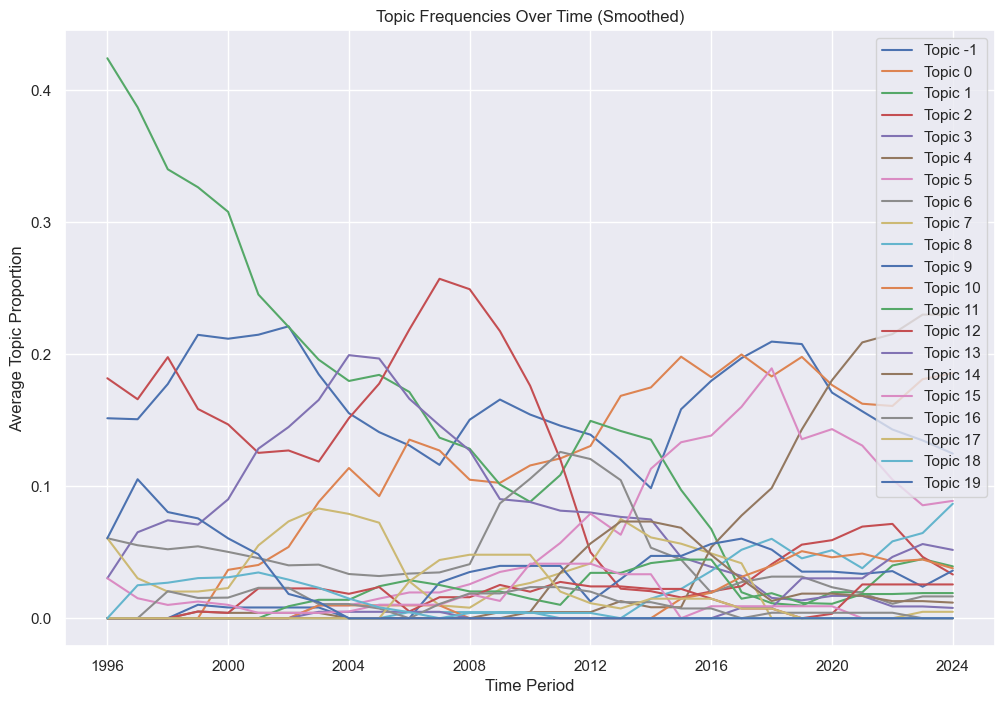

In [8]:
import matplotlib.pyplot as plt
df = pd.DataFrame({"Text": texts, "Timestamp": timestamps, "Topic": topics})

topic_over_time = df.groupby(['Timestamp', 'Topic']).size().unstack(fill_value=0)
topic_over_time = topic_over_time.div(topic_over_time.sum(axis=1), axis=0)

topic_over_time = topic_over_time.sort_index()

topic_over_time_smooth = topic_over_time.rolling(window=5, min_periods=1).mean()
plt.figure(figsize=(12, 8))
for topic in topic_over_time_smooth.columns:
    plt.plot(topic_over_time_smooth.index, topic_over_time_smooth[topic], label=f'Topic {topic}')
plt.xlabel('Time Period')
plt.ylabel('Average Topic Proportion')
plt.title('Topic Frequencies Over Time (Smoothed)')
plt.legend()
plt.show()